# Decision-Tree Classifier

> - 참고자료: https://scikit-learn.org/stable/modules/tree.html
> - Dataset: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing

- decision-tree는 결정에 도달하기 위해 예/아니오 질문을 거쳐가며 학습하는 분류/회귀 모델.
- scikit-learn 패키지를 이용해 decision-tree를 만들어본다.
- 은행 고객 데이터를 바탕으로 해당 고객이 예금 계좌를 가지고 있는지(`y` 컬럼) 예측하는 모델을 작성해본다. 

사용할 데이터셋을 로드한다.

In [1]:
import pandas as pd

path = 'dataset/bank-marketing.csv'
data = pd.read_csv(path, delimiter=';')

In [2]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


학습 데이터셋과 테스트 데이터셋을 분리한다.

In [19]:
from sklearn.model_selection import train_test_split

x_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', '']
y_column = ['y']

x_train, x_test, y_train, y_test = train_test_split(
    data[x_columns],
    data[y_column],
)

In [20]:
x_train

,age,job,marital,education,default,housing,loan
18687,34,technician,divorced,unknown,no,yes,yes
9690,26,technician,married,professional.course,no,no,no
14667,32,services,single,unknown,unknown,yes,yes
29593,34,technician,married,basic.9y,no,no,no
39090,35,blue-collar,married,basic.9y,no,no,yes
...,...,...,...,...,...,...,...
18691,36,admin.,single,university.degree,no,yes,no
23610,35,admin.,married,university.degree,no,yes,no
18897,33,technician,divorced,professional.course,no,no,yes
9436,54,blue-collar,married,basic.4y,no,no,no


In [21]:
y_train

,y
18687,no
9690,no
14667,no
29593,no
39090,no
...,...
18691,no
23610,no
18897,no
9436,no


row 값을 numeric하게 인코딩하는 전처리를 수행한다.

In [6]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=x_columns)
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [7]:
x_train

,age,job,marital,education,default,housing,loan
2761,1,1,1,1,1,1,1
15709,2,2,2,2,2,2,1
10031,3,3,3,2,2,2,1
30671,4,4,2,3,2,1,1
27020,4,5,2,4,2,1,1
...,...,...,...,...,...,...,...
30131,5,5,3,4,2,1,2
1475,35,7,3,4,2,2,1
4629,10,1,2,3,1,1,1
31236,7,6,3,6,2,1,1


In [8]:
x_test

,age,job,marital,education,default,housing,loan
27578,23,6,3,7,2,1,1
4685,32,6,2,4,2,1,2
22956,13,6,2,4,1,1,1
11121,5,2,2,1,2,2,1
24208,13,9,2,4,2,1,1
...,...,...,...,...,...,...,...
758,32,2,2,2,1,1,1
27819,36,5,2,4,2,2,1
1268,18,2,2,1,2,2,1
3512,11,4,2,3,1,1,1


`x_train` to `y_train`으로 decision-tree 모델을 학습시키고, `x_test` to `y_test` 예측의 정확도를 확인한다.

In [17]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(x_train, y_train)

res = clf.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, res))

Accuracy: 0.89


graphviz를 통해 트리를 시각화할 수도 있다.

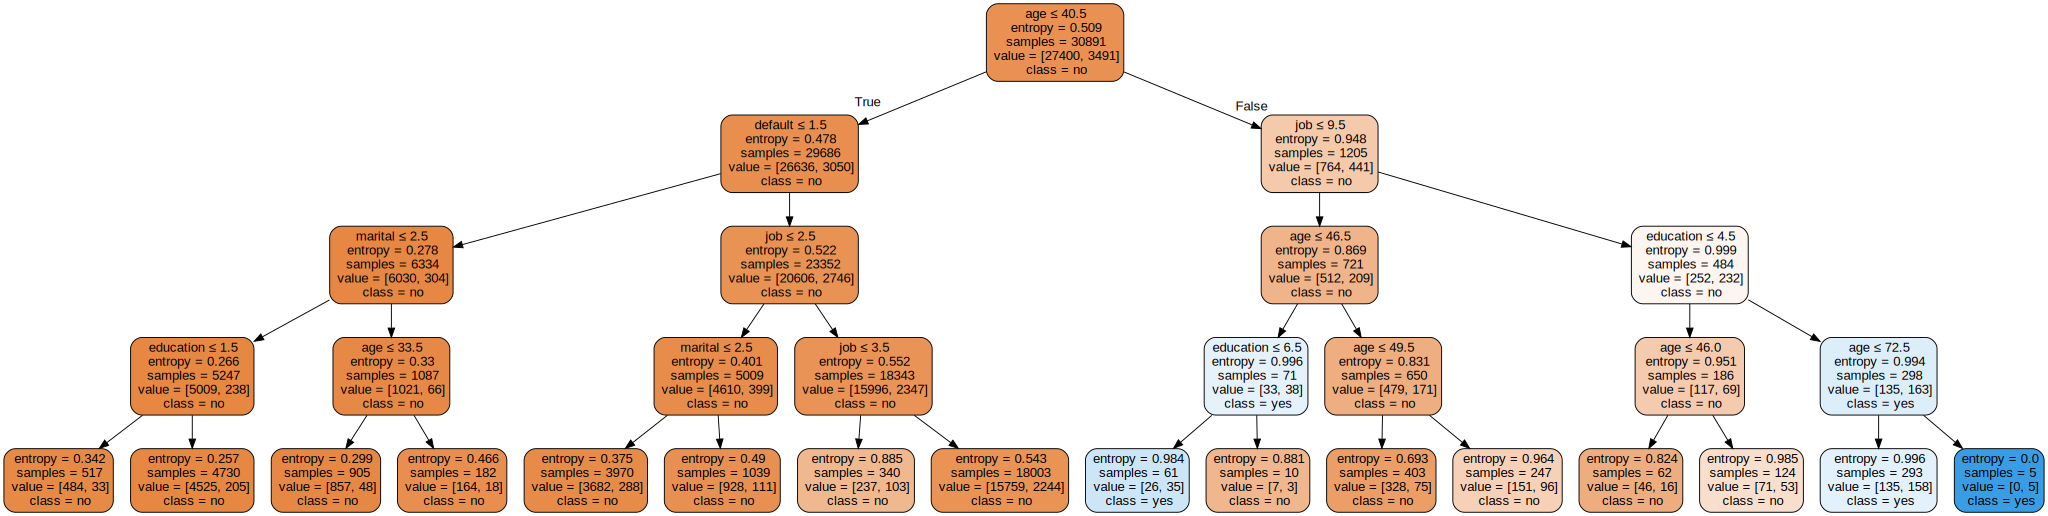

In [18]:
import graphviz

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=list(x_test.columns),  
    class_names=['no', 'yes'],
    filled=True,
    rounded=True,  
    special_characters=True,
)

graphviz.Source(dot_data)